# Campus Crime and Disciplinary Data

In [87]:
%matplotlib inline

import os
import xlrd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
ocd09 = xlrd.open_workbook('crime-sheets/Crime2009EXCEL/oncampusdiscipline060708.xls', logfile=open(os.devnull, 'w'))
ocd08 = xlrd.open_workbook('crime-sheets/Crime2008EXCEL/oncampusdiscipline050607.xls', logfile=open(os.devnull, 'w'))
ocd09df = pd.read_excel(ocd09, engine='xlrd')
ocd08df = pd.read_excel(ocd08, engine='xlrd')

In [89]:
ocd16df = pd.read_excel('crime-sheets/Crime2016EXCEL/oncampusdiscipline131415.xls')
ocd15df = pd.read_excel('crime-sheets/Crime2015EXCEL/oncampusdiscipline121314.xls')
ocd14df = pd.read_excel('crime-sheets/Crime2014EXCEL/oncampusdiscipline111213.xls')
ocd13df = pd.read_excel('crime-sheets/Crime2013EXCEL/oncampusdiscipline101112.xls')
ocd12df = pd.read_excel('crime-sheets/Crime2012EXCEL/oncampusdiscipline091011.xls')
ocd11df = pd.read_excel('crime-sheets/Crime2011EXCEL/oncampusdiscipline080910.xls')
ocd10df = pd.read_excel('crime-sheets/Crime2010EXCEL/oncampusdiscipline070809.xls')
#ocd09df = pd.read_excel('crime-sheets/Crime2009EXCEL/oncampusdiscipline060708.xls')
#ocd08df = pd.read_excel('crime-sheets/Crime2008EXCEL/oncampusdiscipline050607.xls')
# rename total, Zip column in 08 for consistency with the rest of the sheets
ocd08df = ocd08df.rename(index=str, columns={'total': 'Total', 'Zip': 'ZIP'}) 
# rename the 09 columsn in 10 report due to typo
ocd10df = ocd10df.rename(index=str, columns={'WEAPON8.1': 'WEAPON9', 'DRUG8.1': 'DRUG9', 'LIQUOR8.1': 'LIQUOR9'}) 
ocd_dfs = [ocd16df ,ocd15df, ocd14df, ocd13df, ocd12df, ocd11df, ocd10df, ocd09df, ocd08df]
len(ocd_dfs)

9

In [ ]:
ocd08df = ocd08df[]

In [84]:
list(ocd08df)

[u'UNITID_P',
 u'INSTNM',
 u'BRANCH',
 u'Address',
 u'City',
 u'State',
 'ZIP',
 u'sector_cd',
 u'sector_desc',
 u'men_total',
 u'women_total',
 'Total',
 u'Weapon5',
 u'Drug5',
 u'Liquor5',
 u'Weapon6',
 u'Drug6',
 u'Liquor6',
 u'Weapon7',
 u'Drug7',
 u'Liquor7',
 u'FILTER05',
 u'FILTER06',
 u'FILTER07']

In [40]:
i = ocd16df
i = i.drop(list(i)[1:12], 1)
i = i[list(i)[:len(list(i))-3]]
list(i)

[u'UNITID_P',
 u'WEAPON13',
 u'DRUG13',
 u'LIQUOR13',
 u'WEAPON14',
 u'DRUG14',
 u'LIQUOR14',
 u'WEAPON15',
 u'DRUG15',
 u'LIQUOR15']

In [85]:
df = pd.DataFrame(ocd16df)
# old cold used for merging intersection of columns
#    on=list(set(list(df)) & set(list(i))

#i = ocd09df
#i = i.drop(list(i)[1:12], 1)
#i = i[list(i)[:len(list(i))-3]]
#df = df.merge(i, how='inner', on=list(set(list(df)) & set(list(i))))

for i in ocd_dfs: 
    i = i.drop(list(i)[1:12], 1)
    i = i[list(i)[:len(list(i))-3]]
    #print list(set(list(df)) & set(list(i)))
    df = df.merge(i, how='inner', on=list(set(list(df)) & set(list(i))))
    df.dropna()
    print df.shape

print 'done'

(11306, 24)
(10620, 27)
(9820, 30)
(9187, 33)
(8661, 36)
(7957, 39)
(7426, 42)
(0, 51)
(0, 54)
done


In [68]:
# more cleaning
df

,UNITID_P,INSTNM,BRANCH,Address,City,State,ZIP,sector_cd,Sector_desc,men_total,...,FILTER15,WEAPON7,DRUG7,LIQUOR7,WEAPON8,DRUG8,LIQUOR8,WEAPON9,DRUG9,LIQUOR9
0,100654001,Alabama A & M University,Main Campus,4900 MERIDIAN ST,NORMAL,AL,35762,1,"Public, 4-year or above",2409.0,...,1,5.0,22.0,1.0,4.0,9.0,4.0,7.0,6.0,0.0
1,100663001,University of Alabama at Birmingham,Main Campus,"ADMINISTRATION BLDG SUITE 1070, 701 20th Stree...",BIRMINGHAM,AL,352940110,1,"Public, 4-year or above",7185.0,...,1,0.0,2.0,40.0,0.0,11.0,20.0,0.0,18.0,60.0
2,100690001,Amridge University,Main Campus,1200 TAYLOR RD,MONTGOMERY,AL,361173553,2,"Private nonprofit, 4-year or above",257.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100706001,University of Alabama in Huntsville,Main Campus,301 SPARKMAN DR,HUNTSVILLE,AL,35899,1,"Public, 4-year or above",4464.0,...,1,0.0,0.0,24.0,0.0,5.0,43.0,0.0,9.0,29.0
4,100724001,Alabama State University,Main Campus,915 SOUTH JACKSON ST,MONTGOMERY,AL,361040271,1,"Public, 4-year or above",2017.0,...,1,13.0,22.0,0.0,4.0,18.0,6.0,2.0,21.0,1.0
5,100751001,The University of Alabama,Main Campus,1110 Jackson Ave,TUSCALOOSA,AL,354870180,1,"Public, 4-year or above",16564.0,...,1,0.0,48.0,270.0,0.0,42.0,325.0,1.0,65.0,442.0
6,100760001,Central Alabama Community College,Alexander City Campus,1675 Cherokee Rd,Alexander City,AL,35010,4,"Public, 2-year",796.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,100760002,Central Alabama Community College,Childersburg Campus,34091 Highway 280,Childersburg,AL,35044,4,"Public, 2-year",796.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100812001,Athens State University,Athens State University Main Campus,300 N BEATY ST,ATHENS,AL,35611,1,"Public, 4-year or above",1063.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,100830001,Auburn University at Montgomery,Auburn University Montgomery,7400 EAST DRIVE,MONTGOMERY,AL,361173596,1,"Public, 4-year or above",1735.0,...,1,0.0,3.0,11.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
df = pd.merge(ocd15df, ocd16df, how='inner', on=list(set(list(ocd15df)) & set(list(ocd16df))))

In [71]:
list(df)

[u'Address',
 u'City',
 u'State',
 u'ZIP',
 u'sector_cd',
 u'Sector_desc',
 u'men_total',
 u'women_total',
 u'Total',
 u'WEAPON13',
 u'DRUG13',
 u'LIQUOR13',
 u'WEAPON14',
 u'DRUG14',
 u'LIQUOR14',
 u'WEAPON15',
 u'DRUG15',
 u'LIQUOR15',
 u'FILTER13',
 u'FILTER14',
 u'FILTER15',
 u'WEAPON12',
 u'DRUG12',
 u'LIQUOR12',
 u'FILTER12',
 u'WEAPON11',
 u'DRUG11',
 u'LIQUOR11',
 u'FILTER11',
 u'WEAPON10',
 u'DRUG10',
 u'LIQUOR10',
 u'FILTER10',
 u'WEAPON9',
 u'DRUG9',
 u'LIQUOR9',
 u'FILTER09',
 u'WEAPON8',
 u'DRUG8',
 u'LIQUOR8',
 u'FILTER08',
 u'WEAPON7',
 u'DRUG7',
 u'LIQUOR7',
 u'WEAPON8.1',
 u'DRUG8.1',
 u'LIQUOR8.1',
 u'Weapon8',
 u'Drug8',
 u'Liquor8',
 u'UNITID_P',
 u'INSTNM',
 u'BRANCH',
 u'Zip',
 u'sector_desc',
 u'Weapon5',
 u'Drug5',
 u'Liquor5',
 u'Weapon6',
 u'Drug6',
 u'Liquor6',
 u'Weapon7',
 u'Drug7',
 u'Liquor7',
 u'FILTER05',
 u'FILTER06',
 u'FILTER07']

In [10]:
UC_df = df[df['INSTNM'].str.match('University of California*', case=False)]

In [21]:
UC_df = UC_df.drop(['UNITID_P', 'Address', 'BRANCH', 'Address', 'City', 'State', 'ZIP', 'sector_cd', 'Sector_desc', 'FILTER13', 'FILTER14', 'FILTER15', 'men_total', 'women_total', 'Total'], 1)

In [22]:
UC_df = UC_df.groupby(UC_df.INSTNM).sum()

,WEAPON13,DRUG13,LIQUOR13,WEAPON14,DRUG14,LIQUOR14,WEAPON15,DRUG15,LIQUOR15
INSTNM,,,,,,,,,
University of California-Berkeley,1.0,45.0,24.0,11.0,52.0,16.0,3,67,15
University of California-Davis,2.0,19.0,1.0,1.0,27.0,7.0,0,23,15
University of California-Hastings College of Law,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
University of California-Irvine,2.0,45.0,448.0,2.0,28.0,558.0,1,43,410
University of California-Los Angeles,1.0,86.0,407.0,1.0,87.0,386.0,0,89,406
University of California-Merced,1.0,25.0,41.0,0.0,28.0,70.0,0,37,25
University of California-Riverside,3.0,3.0,7.0,2.0,3.0,15.0,3,8,82
University of California-San Diego,3.0,403.0,1707.0,7.0,500.0,1879.0,2,294,1348
University of California-San Francisco,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0


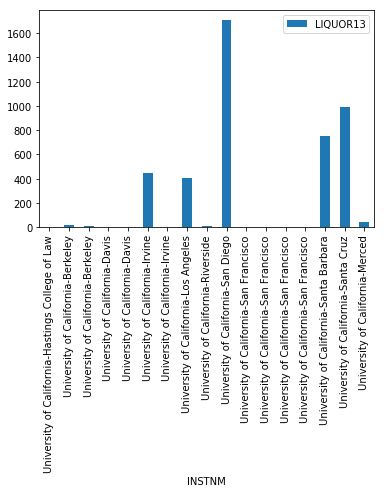

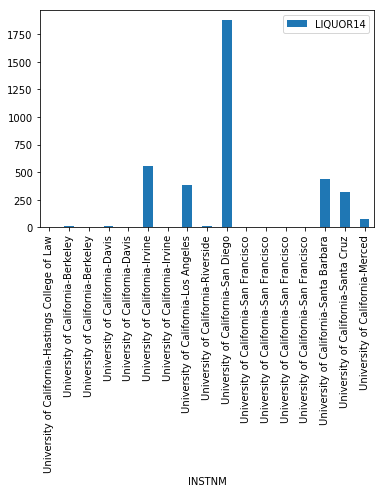

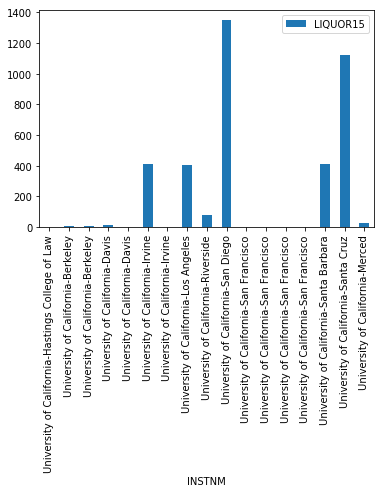

In [26]:
UC_df.plot.bar(x='INSTNM', y='LIQUOR13')
UC_df.plot.bar(x='INSTNM', y='LIQUOR14')
UC_df.plot.bar(x='INSTNM', y='LIQUOR15')